## Calculating bond orientational order parameters

This example illustrates the calculation of bond orientational order parameters. Bond order parameters, $q_l$ and their averaged versions, $\bar{q}_l$ are widely used to  identify atoms belong to different crystal structures. In this example, we will consider MD snapshots for bcc, fcc, hcp and liquid, and calculate the $q_4$ and $q_6$ parameters and their averaged versions which are widely used in literature. More details can be found [here](https://pyscal.readthedocs.io/en/latest/steinhardtparameters.html). 

In [1]:
import pyscal.core as pc
import numpy as np
import matplotlib.pyplot as plt

In this example, we analyse MD configurations, first a set of perfect bcc, fcc and hcp structures and another set with thermal vibrations.

### Perfect structures

#### Read in the input files

First `System` objects are created for each of the different configurations and the input files are read in.

In [16]:
bcc = pc.System()
bcc.read_inputfile('conf0.bcc', format='lammps-dump')
fcc = pc.System()
fcc.read_inputfile('conf0.fcc', format='lammps-dump')
hcp = pc.System()
hcp.read_inputfile('conf0.hcp', format='lammps-dump')

Next step is calculation of nearest neighbors. There are two ways to calculate neighbors, by using a cutoff distance or by using the voronoi cells.

#### $q_4-q_6$ cutoff neighbor method

In [3]:
bcc.find_neighbors(method='cutoff', cutoff=3.50)
fcc.find_neighbors(method='cutoff', cutoff=3.50)
hcp.find_neighbors(method='cutoff', cutoff=3.50)

We have used a cutoff of 3 here, but this is a parameter that has to be tuned. Using a different cutoff for each structure is possible, but it would complicate the method if the system has a mix of structures. Now we can calculate the $q_4$ and $q_6$ distributions 

In [4]:
bcc.calculate_q([4,6])
fcc.calculate_q([4,6])
hcp.calculate_q([4,6])

Thats it! Now lets gather the results and plot them.

In [5]:
bccq = bcc.get_qvals([4, 6])
fccq = fcc.get_qvals([4, 6])
hcpq = hcp.get_qvals([4, 6])

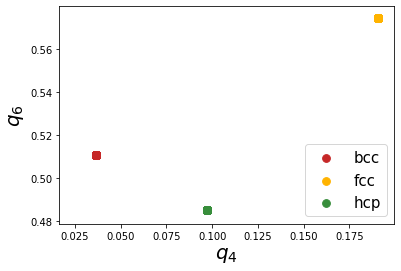

In [6]:
plt.scatter(bccq[0], bccq[1], s=60, label='bcc', color='#C62828')
plt.scatter(fccq[0], fccq[1], s=60, label='fcc', color='#FFB300')
plt.scatter(hcpq[0], hcpq[1], s=60, label='hcp', color='#388E3C')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

Firstly, we can see that Steinhardt parameter values of all the atoms fall on one specific point which is due to the absence of thermal vibrations. Next, all the points are well separated and show good distinction. However, at finite temperatures, the atomic positions are affected by thermal vibrations and hence show a spread in the distribution. We will show the effect of thermal vibrations in the next example. 

### Structures with thermal vibrations

First we read the MD configurations

In [23]:
bcc = pc.System()
bcc.read_inputfile('conf.bcc.dump', format='lammps-dump')
fcc = pc.System()
fcc.read_inputfile('conf.fcc.dump', format='lammps-dump')
hcp = pc.System()
hcp.read_inputfile('conf.hcp.dump', format='lammps-dump')
lqd = pc.System()
lqd.read_inputfile('conf.lqd', format='lammps-dump')

Similar to the previous example, we use the cutoff method

#### cutoff method

In [24]:
bcc.find_neighbors(method='cutoff', cutoff=3.50)
fcc.find_neighbors(method='cutoff', cutoff=3.50)
hcp.find_neighbors(method='cutoff', cutoff=3.50)
lqd.find_neighbors(method='cutoff', cutoff=3.50)

And now, calculate $q_4$, $q_6$ parameters

In [25]:
bcc.calculate_q([4,6])
fcc.calculate_q([4,6])
hcp.calculate_q([4,6])
lqd.calculate_q([4,6])

Gather the q vales and plot them

In [26]:
bccq = bcc.get_qvals([4, 6])
fccq = fcc.get_qvals([4, 6])
hcpq = hcp.get_qvals([4, 6])
lqdq = lqd.get_qvals([4, 6])

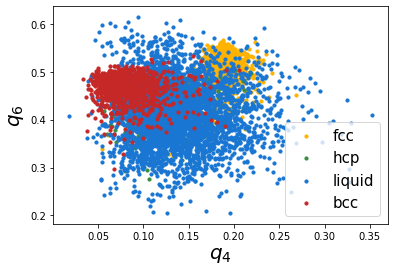

In [27]:
plt.scatter(fccq[0], fccq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpq[0], hcpq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(lqdq[0], lqdq[1], s=10, label='liquid', color='#1976D2')
plt.scatter(bccq[0], bccq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

This is not so great as the first case, we can see that the thermal vibrations cause the distributions to spread a lot and overlap with each other. Lechner and Dellago proposed using the averaged distributions, $\bar{q}_4-\bar{q}-6$ to better distinguish the distributions. Lets try that. 

In [28]:
bcc.calculate_q([4,6], averaged=True)
fcc.calculate_q([4,6], averaged=True)
hcp.calculate_q([4,6], averaged=True)
lqd.calculate_q([4,6], averaged=True)

In [29]:
bccaq = bcc.get_qvals([4, 6], averaged=True)
fccaq = fcc.get_qvals([4, 6], averaged=True)
hcpaq = hcp.get_qvals([4, 6], averaged=True)
lqdaq = lqd.get_qvals([4, 6], averaged=True)

Lets see if these distributions are better..

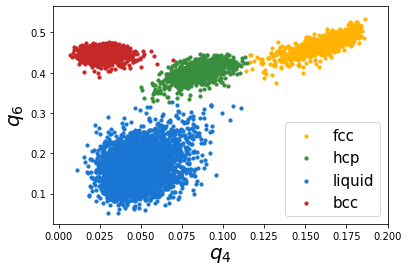

In [30]:
plt.scatter(fccaq[0], fccaq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpaq[0], hcpaq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(lqdaq[0], lqdaq[1], s=10, label='liquid', color='#1976D2')
plt.scatter(bccaq[0], bccaq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

This looks much better! We can see that the resolution is much better than the non averaged versions.

There is also the possibility to calculate structures using Voronoi based neighbor identification too.